<a href="https://colab.research.google.com/github/DitaAnatasya/google_colab/blob/main/FinalProject_DitaAnatasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Electric vehicle population

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric
Vehicles (PHEVs) that are currently registered through Washington State
Department of Licensing.

In [ ]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

##**Exploratory Data Analysis**

### **Data Mentah (belum diolah)**

In [ ]:
rawdata = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [ ]:
rawdata.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018.0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,14.0,141151601.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021.0,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,36.0,9426525.0,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,36.0,211807760.0,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,22.0,185810306.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
rawdata.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
30726,3FMTK4SE6N,King,Mercer Island,WA,98040.0,2022.0,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,209974145.0,POINT (-122.21238 47.57816),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
30727,YV4ED3UR2M,King,Seattle,WA,98102.0,2021.0,VOLVO,XC40,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,43.0,166859052.0,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
30728,5YJ3E1EB1J,King,Sammamish,WA,98075.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,41.0,475257884.0,POINT (-122.03539 47.61344),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
30729,1N4AZ0CP2F,King,Seattle,WA,98116.0,2015.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,34.0,223546746.0,POINT (-122.41067 47.57894),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
30730,7SAYGAEE3N,King,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rawdata.shape

(30731, 17)

In [ ]:
rawdata.isnull().sum()

VIN (1-10)                                            0
County                                                2
City                                                  2
State                                                 1
Postal Code                                           3
Model Year                                            1
Make                                                  1
Model                                                48
Electric Vehicle Type                                 1
Clean Alternative Fuel Vehicle (CAFV) Eligibility     1
Electric Range                                        1
Base MSRP                                             1
Legislative District                                  3
DOL Vehicle ID                                        1
Vehicle Location                                      5
Electric Utility                                      3
2020 Census Tract                                     3
dtype: int64

In [ ]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30731 entries, 0 to 30730
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         30731 non-null  object 
 1   County                                             30729 non-null  object 
 2   City                                               30729 non-null  object 
 3   State                                              30730 non-null  object 
 4   Postal Code                                        30728 non-null  float64
 5   Model Year                                         30730 non-null  float64
 6   Make                                               30730 non-null  object 
 7   Model                                              30683 non-null  object 
 8   Electric Vehicle Type                              30730 non-null  object 
 9   Clean 

### **Data setelah diolah menggunakan pentaho data integration**

In [ ]:
data = pd.read_csv('final_project.csv')

In [ ]:
data.head()

,Vehicle ID Number,county,city,Postal Code,Model Year,brand,model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1F2AFY8P,Thurston,Lacey,98516,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible,23,22,227213871,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,53067012225
1,WAUUPBFF5H,Snohomish,Everett,98203,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible,16,38,139635317,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061041100
2,WA1VAAGE9K,King,Kirkland,98034,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligible,204,45,308905117,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033022006
3,WA1AAAGE9M,Kitsap,Port Orchard,98367,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Eligible,222,35,156660507,POINT (-122.65745 47.4916),PUGET SOUND ENERGY INC,53035092901
4,WAUUPBFF6G,King,North Bend,98045,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible,16,5,259168577,POINT (-121.7831 47.49348),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032704


In [ ]:
data.tail()

,Vehicle ID Number,county,city,Postal Code,Model Year,brand,model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
129601,YV4BC0PK0G,Chelan,Manson,98831,2016,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not Eligible,13,12,117290120,POINT (-120.16034 47.8854),PUD NO 1 OF CHELAN COUNTY,53007960400
129602,YV4ED3GM4P,Kittitas,Snoqualmie Pass,98068,2023,VOLVO,C40,Battery Electric Vehicle (BEV),Unknown,0,13,227420679,POINT (-121.41201 47.41873),PUGET SOUND ENERGY INC,53037975101
129603,1W9WL21B6A,Thurston,Olympia,98501,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),Eligible,100,22,244618104,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,53067010700
129604,1W9WL21BXA,Spokane,Spokane,99223,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),Eligible,100,6,277235017,POINT (-117.36043 47.63396),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,53063004800
129605,1W9WL21B6A,Pierce,Tacoma,98406,2010,WHEEGO ELECTRIC CARS,WHEEGO,Plug-in Hybrid Electric Vehicle (PHEV),Eligible,100,28,143716758,POINT (-122.52054 47.26887),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,53053060907


In [ ]:
data.shape

(129606, 15)

In [ ]:
data.isnull().sum()

Vehicle ID Number                                    0
county                                               0
city                                                 0
Postal Code                                          0
Model Year                                           0
brand                                                0
model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129606 entries, 0 to 129605
Data columns (total 15 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   Vehicle ID Number                                  129606 non-null  object
 1   county                                             129606 non-null  object
 2   city                                               129606 non-null  object
 3   Postal Code                                        129606 non-null  int64 
 4   Model Year                                         129606 non-null  int64 
 5   brand                                              129606 non-null  object
 6   model                                              129606 non-null  object
 7   Electric Vehicle Type                              129606 non-null  object
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  129606 non-null  object
 9   Elec

In [ ]:
data.describe()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,129606.000000,129606.000000,129606.000000,129606.000000,1.296060e+05,1.296060e+05
mean,98257.910197,2019.550067,76.854652,29.620766,2.051700e+08,5.303962e+10
std,302.077639,2.988215,99.456114,14.751033,8.717746e+07,1.616872e+07
min,98001.000000,1997.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,18.000000,1.567798e+08,5.303301e+10
50%,98121.000000,2020.000000,24.000000,34.000000,2.034411e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,43.000000,2.289199e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,49.000000,4.792548e+08,5.307794e+10


In [ ]:
data.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'Eligibility',}, inplace=True)
data.Eligibility.value_counts()

Eligible        60278
Unknown         53002
Not Eligible    16326
Name: Eligibility, dtype: int64

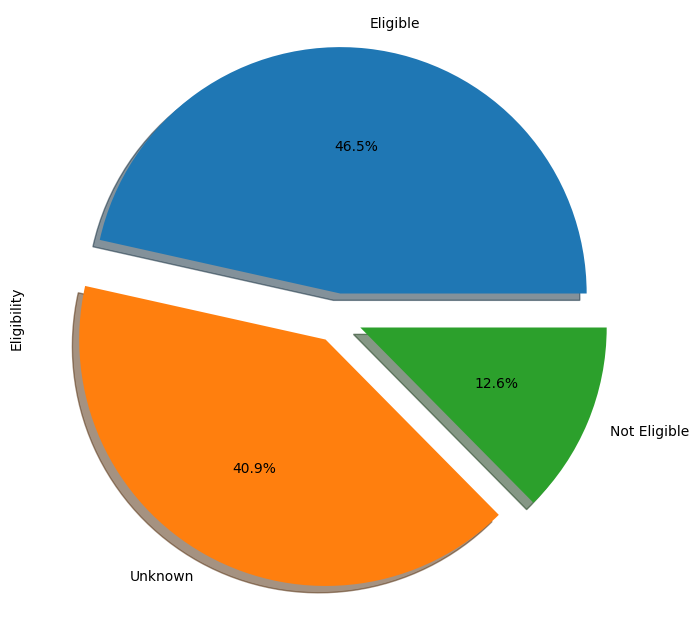

In [ ]:
data['Eligibility'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',
shadow=True, figsize=(10,8))
plt.show()

In [ ]:
data.rename(columns={'Electric Vehicle Type':'vehicle_type',}, inplace=True)
data.vehicle_type.value_counts()

Battery Electric Vehicle (BEV)            99527
Plug-in Hybrid Electric Vehicle (PHEV)    30079
Name: vehicle_type, dtype: int64

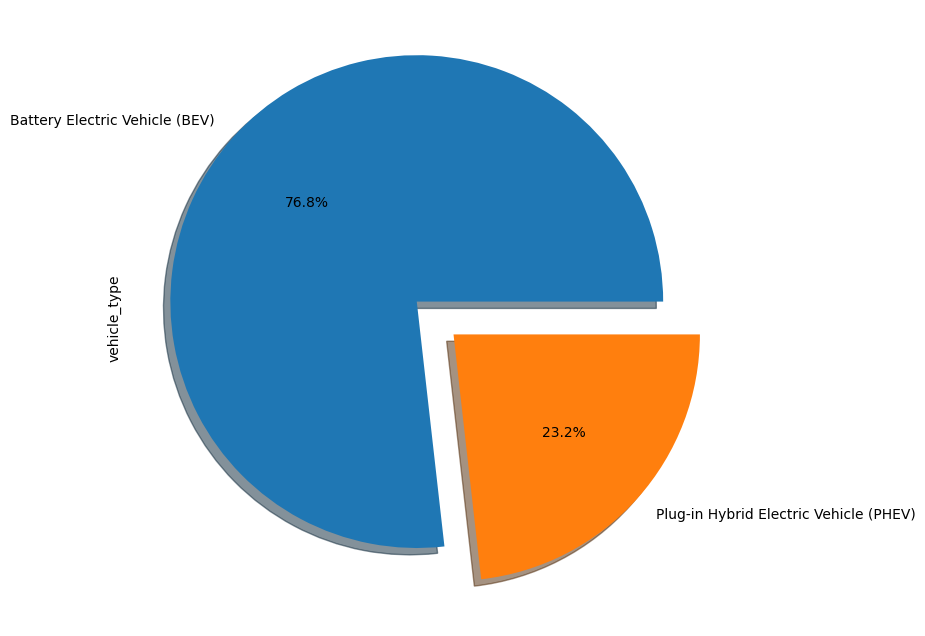

In [ ]:
data['vehicle_type'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',
shadow=True, figsize=(10,8))
plt.show()

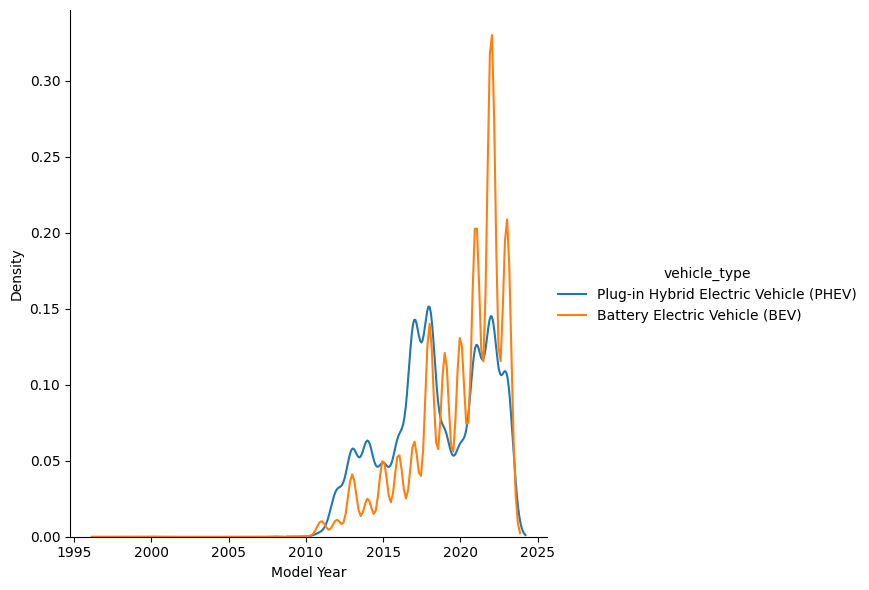

In [ ]:
sns.FacetGrid(data, hue="vehicle_type", height=6) \
.map(sns.kdeplot, "Model Year") \
.add_legend()

In [ ]:
data.corr()

<ipython-input-81-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.000000,-0.054657,-0.017192,-0.421744,-0.003200,0.018495
Model Year,-0.054657,1.000000,-0.374550,-0.004749,-0.008407,-0.027557
Electric Range,-0.017192,-0.374550,1.000000,0.026977,-0.015159,-0.012234
Legislative District,-0.421744,-0.004749,0.026977,1.000000,-0.006469,-0.106270
DOL Vehicle ID,-0.003200,-0.008407,-0.015159,-0.006469,1.000000,-0.002647
2020 Census Tract,0.018495,-0.027557,-0.012234,-0.106270,-0.002647,1.000000


In [ ]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-82-96612fe94b20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
<ipython-input-82-96612fe94b20>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
Postal Code,1.00,-0.05,-0.02,-0.42,-0.00,0.02
Model Year,-0.05,1.00,-0.37,-0.00,-0.01,-0.03
Electric Range,-0.02,-0.37,1.00,0.03,-0.02,-0.01
Legislative District,-0.42,-0.00,0.03,1.00,-0.01,-0.11
DOL Vehicle ID,-0.00,-0.01,-0.02,-0.01,1.00,-0.00
2020 Census Tract,0.02,-0.03,-0.01,-0.11,-0.00,1.00


<ipython-input-6-be31b9710289>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

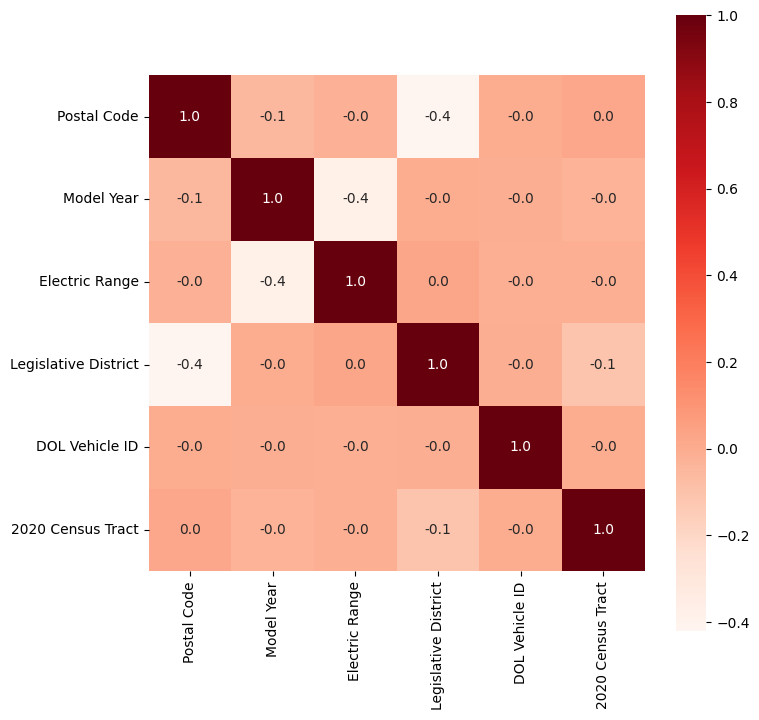

In [ ]:
corr = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            cbar=True,
            square=True,
            fmt=".1f",
            annot=True,
            cmap="Reds")

<Axes: xlabel='Electric Range', ylabel='count'>

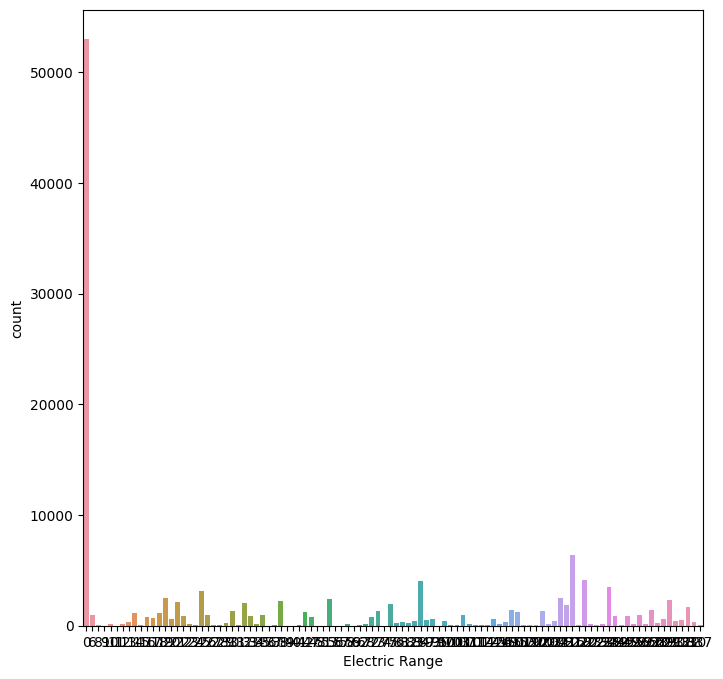

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Electric Range", data=data)

<Axes: xlabel='Postal Code', ylabel='count'>

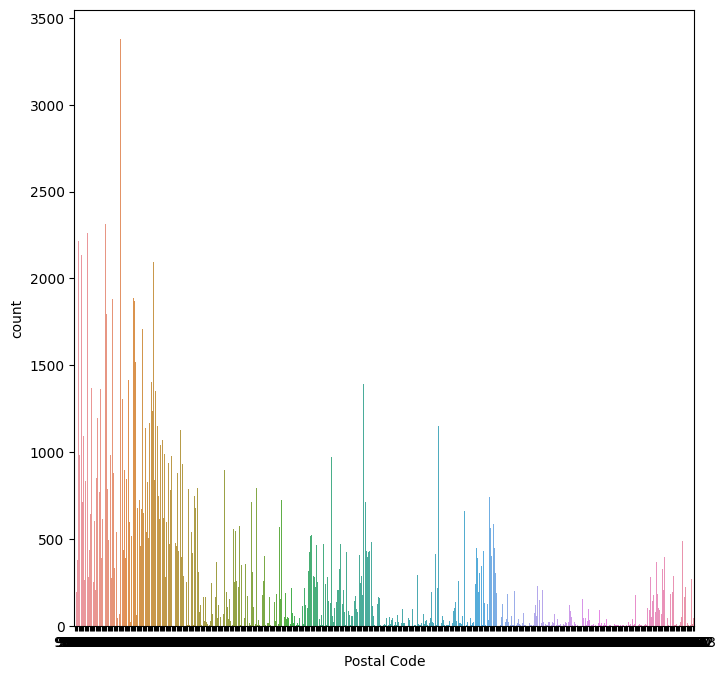

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Postal Code", data=data)

<Axes: xlabel='Model Year', ylabel='count'>

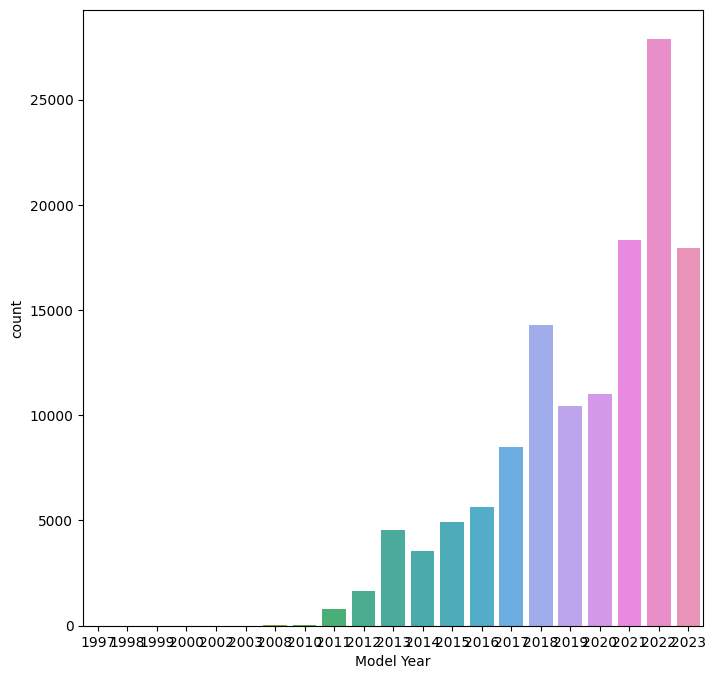

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Model Year", data=data)

In [ ]:
X = data.iloc[:,[3, 4, 9]].values
X

array([[98516,  2023,    23],
       [98203,  2017,    16],
       [98034,  2019,   204],
       ...,
       [98501,  2010,   100],
       [99223,  2010,   100],
       [98406,  2010,   100]])

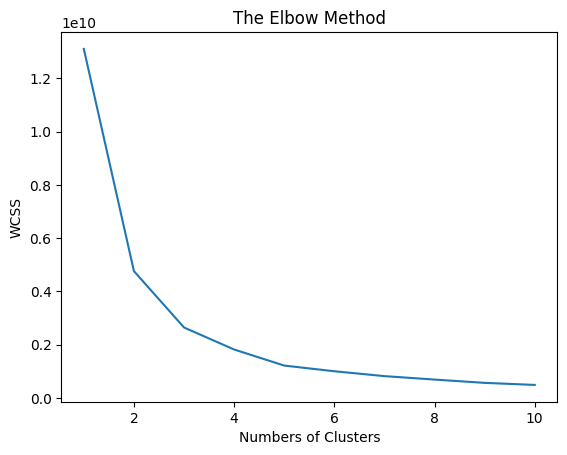

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numbers of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
cluster = kmeans.fit_predict(X)
print(kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)


In [ ]:
y=kmeans.fit_predict(X)
X[y==0,2]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 16, 204,  16, ...,  14,  17,   0])

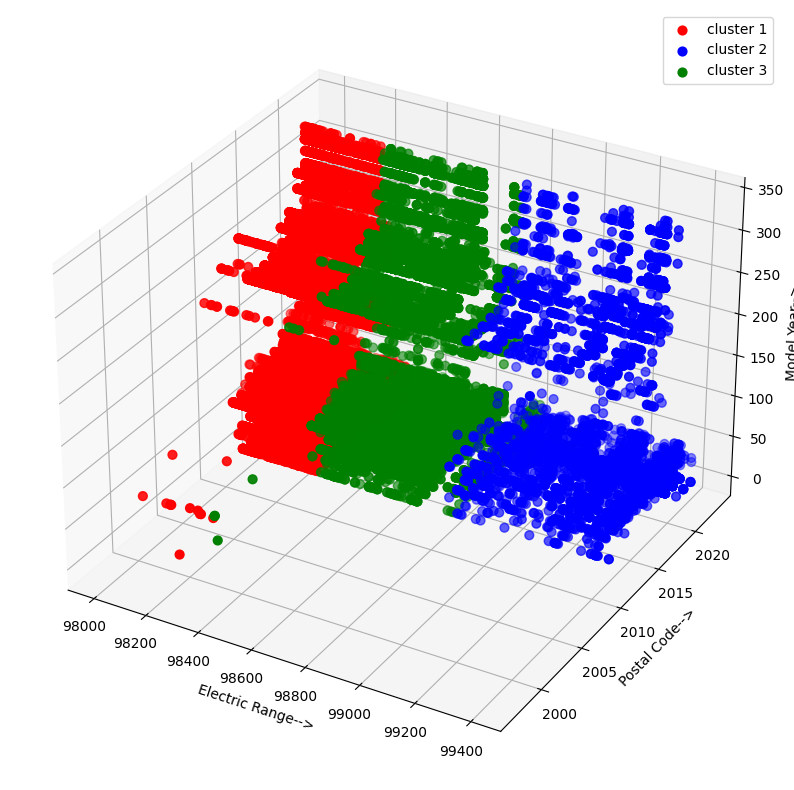

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0,0], X[y == 0,1], X[y == 0,2], s=40, color='red', label="cluster 1")
ax.scatter(X[y == 1,0], X[y == 1,1], X[y == 1,2], s=40, color='blue', label="cluster 2")
ax.scatter(X[y == 2,0], X[y == 2,1], X[y == 2,2], s=40, color='green', label="cluster 3")
ax.set_xlabel("Electric Range-->")
ax.set_ylabel("Postal Code-->")
ax.set_zlabel("Model Year-->")
ax.legend()
plt.show()

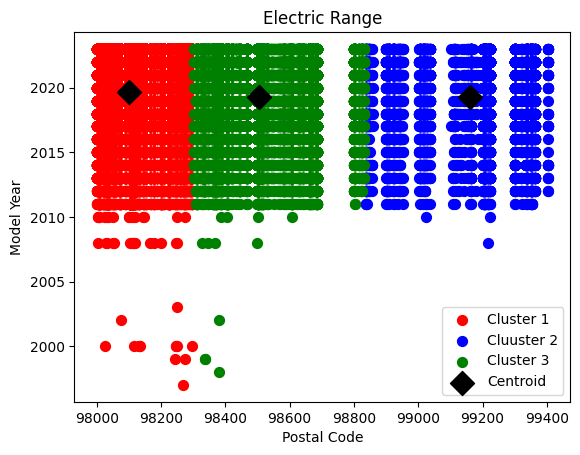

In [ ]:
#Visualizing the clusters
plt.scatter(X[cluster == 0, 0], X[cluster == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[cluster == 1, 0], X[cluster == 1, 1], s = 50, c = 'blue', label = 'Cluuster 2')
plt.scatter(X[cluster == 2, 0], X[cluster == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'black', label = 'Centroid', marker = 'D')
plt.title('Electric Range')
plt.xlabel('Postal Code')
plt.ylabel('Model Year')
plt.legend()
plt.show()